In [ ]:
%matplotlib inline

import dask
import distributed
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seawater as sw
import xarray as xr

# import hvplot.xarray

import dcpy
import pump

# import facetgrid

mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['figure.dpi'] = 250

xr.set_options(keep_attrs=False)

import distributed
import dask_jobqueue

if 'client' in locals():
    client.close(); cluster.close()

cluster = dask_jobqueue.SLURMCluster(
    cores=1, processes=1, memory='25GB',
    walltime='02:00:00', project='NCGD0011')

client = dask.distributed.Client(cluster)

In [ ]:
cluster.adapt(minimum=6, maximum=12, wait_count=600)

In [ ]:
dirname = "/glade/p/cgd/oce/people/bachman/TPOS_MITgcm_HR/"
gcm100 = pump.model(dirname, name="gcm100", full=True)

In [ ]:
surf = xr.open_mfdataset("/glade/p/cgd/oce/people/bachman/TPOS_MITgcm_HR/SURFACE/*.nc", 
                         parallel=True, 
                         chunks={"longitude": 1500, "latitude": 800}, 
                         compat="override", 
                         coords="minimal", 
                         data_vars="minimal")

/glade/u/home/dcherian/miniconda3/envs/dcpy/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: In xarray version 0.14 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  
/gpfs/u/home/dcherian/python/xarray/xarray/backends/api.py:934: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


In [ ]:
zeta = hr.v.differentiate("longitude") - hr.u.differentiate("latitude")

In [ ]:
f = dcpy.oceans.coriolis(hr.latitude)

In [ ]:
z0 = (zeta).isel(time=1).compute()

In [ ]:
import palettable

In [ ]:
t0 = hr.theta.isel(time=1).compute()

In [ ]:
oisst = xr.open_dataset('../glade/obs/oisst/sst.day.mean.1996.nc')

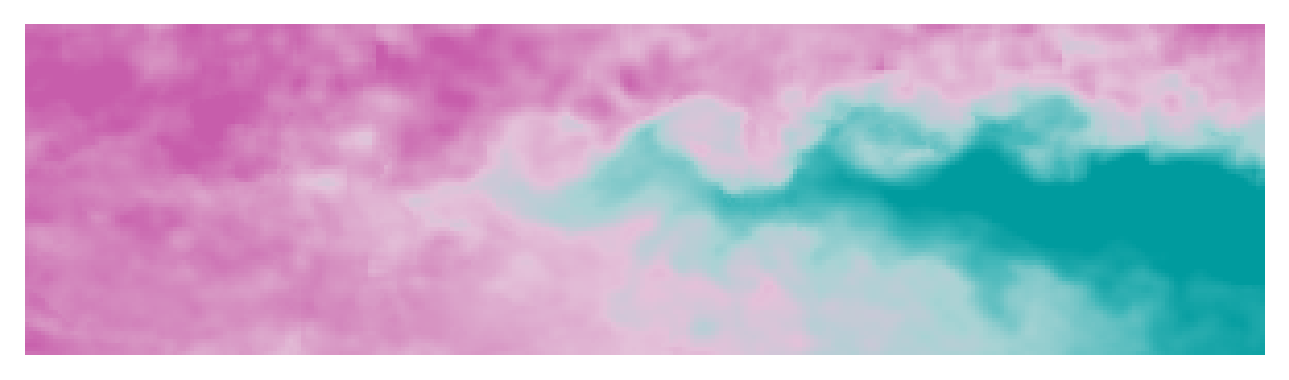

In [ ]:
temp_kwargs = dict(cmap=palettable.cartocolors.diverging.Tropic_6.get_mpl_colormap(), vmin=22, vmax=29, add_colorbar=False)

oisst.sst.sel(lat=slice(-10, 10), lon=slice(-170+360, -95 + 360), time="1996-09-01").plot(**temp_kwargs)
clean(plt.gca())

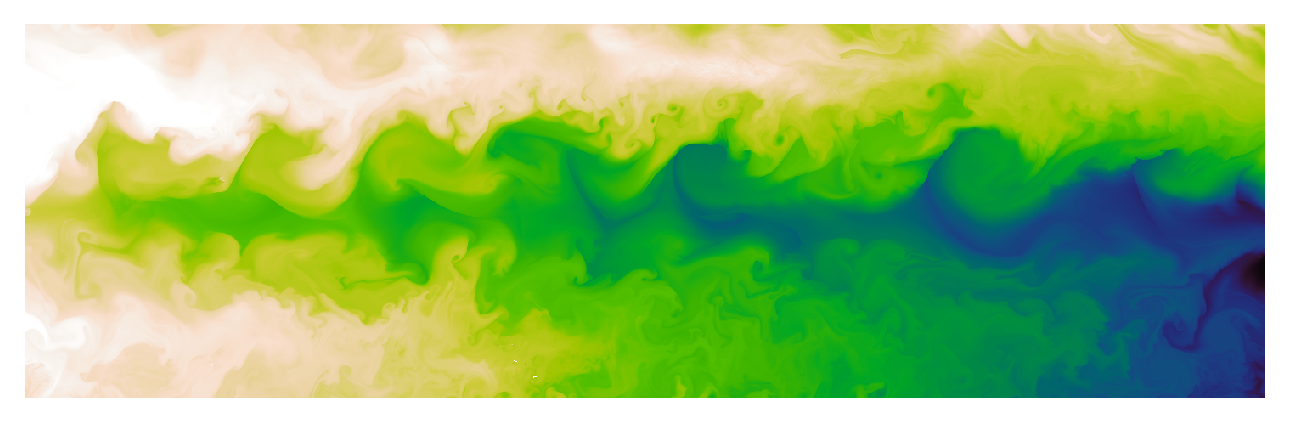

distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


In [ ]:

clean(plt.gca())

In [ ]:
cluster.close()

[autoreload of cesm failed: Traceback (most recent call last):
  File "/glade/u/home/dcherian/miniconda3/envs/dcpy/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/glade/u/home/dcherian/miniconda3/envs/dcpy/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/glade/u/home/dcherian/miniconda3/envs/dcpy/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/glade/u/home/dcherian/miniconda3/envs/dcpy/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/glade/u/home/dcherian/pump/pump/cesm.py", line 2, in <module>
    from . import modify_pop_fo

[None, None]

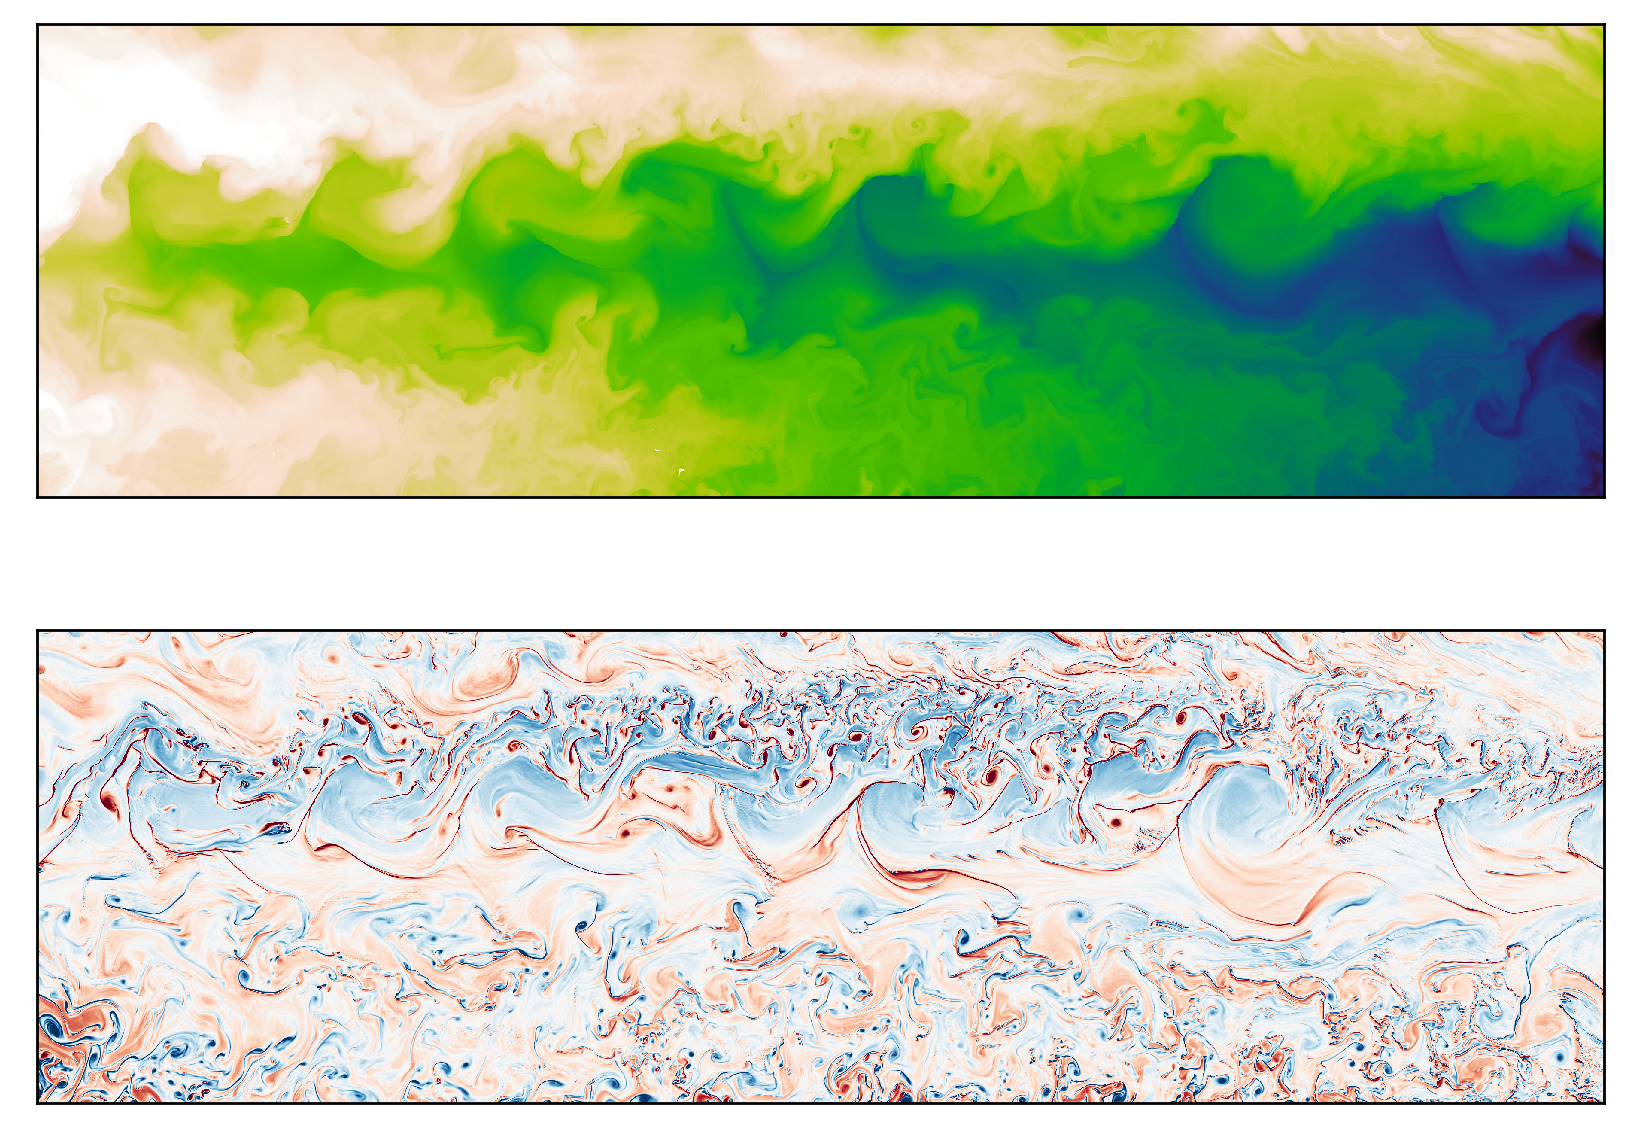

In [ ]:
def clean(ax):
    ax.set_aspect(1)
    ax.set_title("")
    ax.set_xticks([])
    ax.set_yticks([])
    
# cmap = palettable.lightbartlein.RedYellowBlue_r.get_mpl_colormap()
# cmap = palettable.scientific.diverging.Vik_9_r.get_mpl_colormap()
common = dict(add_colorbar=False, add_labels=False, )

f, ax = plt.subplots(2, 1, constrained_layout=True)
f.set_constrained_layout_pads(h_pad=0)
(z0
  .isel(latitude=slice(100, -100), longitude=slice(100, -100))
 .squeeze()[::2, ::2]
 .plot(vmax=3, cmap=mpl.cm.RdBu_r, **common, ax=ax[1]))

(t0
 .isel(latitude=slice(100, -100), longitude=slice(100, -100))
  .squeeze()[::5, ::5]
 .plot(ax=ax[0], cmap=palettable.mycarta.LinearL_20.get_mpl_colormap(), vmin=20, vmax=29, **common))

[clean(aa) for aa in ax]

# anna